In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
N_GENES = 5_000

In [2]:
data = pd.read_table("/Users/andrewjones/Downloads/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows=2)

In [4]:
data.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
1,ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [27]:
expression_data = data.set_index('Description', inplace=False)

In [32]:
expression_data.drop(["Name"], axis=1, inplace=True)

In [33]:
expression_data.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,10.04,12.50000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,0.00,0.06265,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,0.00,0.00000,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [34]:
expression_data_log = np.log(expression_data + 1)

In [35]:
gene_variances = expression_data.var(axis=1)

In [36]:
gene_variances_log = expression_data_log.var(axis=1)

In [43]:
sorted_idx = np.argsort(-gene_variances_log.values)

In [46]:
top_genes_idx = sorted_idx[:N_GENES]

In [47]:
expression_data_log_subsetted = expression_data_log.iloc[top_genes_idx, :]

In [50]:
expression_data_log_subsetted_t = expression_data_log_subsetted.transpose()

In [51]:
expression_data_log_subsetted_t.to_csv("/Users/andrewjones/Documents/beehive/multi-group-GP/data/gtex/gtex_expression_logtpm_top{}genes.csv".format(N_GENES))

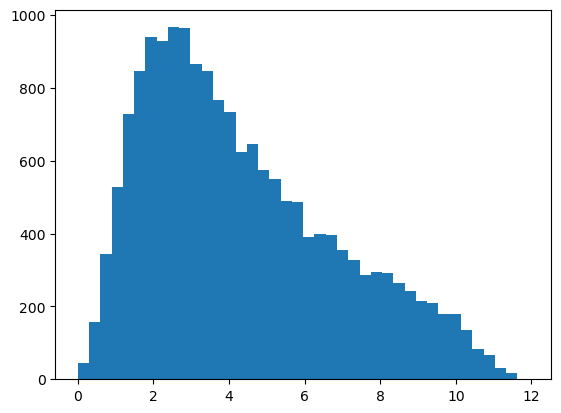

In [60]:
plt.hist(expression_data_log_subsetted_t.iloc[:, 4].values, 40)
plt.show()